In [8]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6
from datetime import datetime
from pmdarima.arima import auto_arima

In [4]:
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
dados = pd.read_csv("AirPassengers.csv", parse_dates=['Month'], index_col='Month',
                    date_parser=dateparse)

In [5]:
dados

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


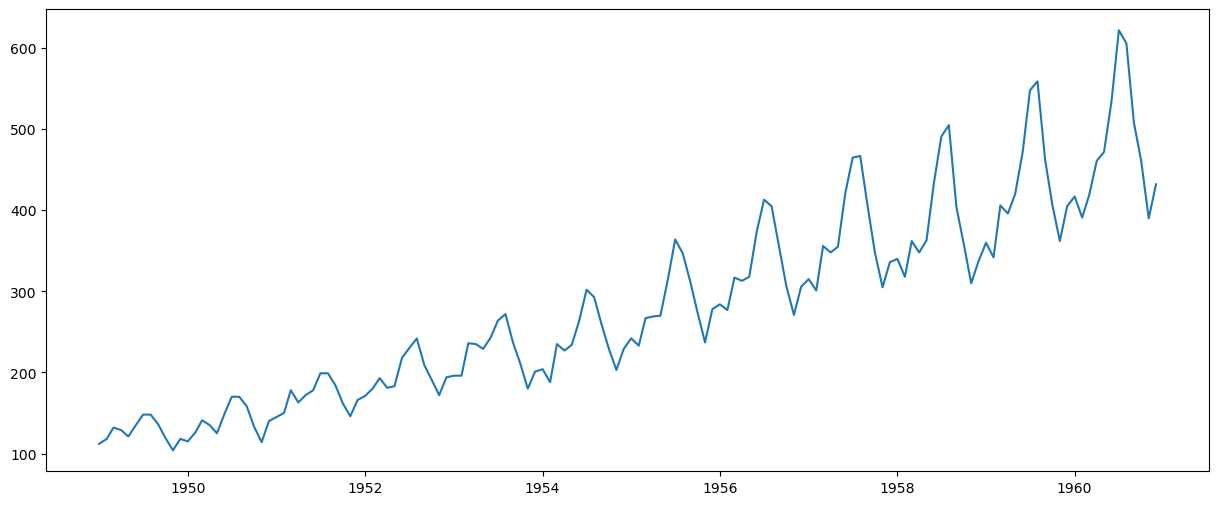

In [21]:
plt.plot(dados)

In [29]:
modelo = auto_arima(dados, start_p=1, start_q=1,
                    start_d=0, start_P=0, max_p=6, max_q=6,
                    m=12, seasonal=True, trace=True, stepwise=False)

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.25 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1030.752, Time=0.40 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=1032.276, Time=0.97 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1030.408, Time=0.14 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1032.128, Time=2.66 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=1034.096, Time=3.00 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.45 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=5.84 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=4.48 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1020.639, Time=0.11 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.34 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1019.494, Time=1.47 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.67 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1020.327, Time=1.12 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=1012.991, Time=5.46 sec
 ARIM

In [30]:
treino = dados.loc['1949-01-01':'1959-12-01']
teste = dados.loc['1960-01-01':]

In [31]:
modelo.fit(treino)

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(1, 1, 2, 12),
      suppress_warnings=True, with_intercept=False)

In [38]:
previsao_teste = modelo.predict(12)

In [39]:
previsao_teste = pd.DataFrame(previsao_teste, columns=["Previsão_teste"])

<AxesSubplot:>

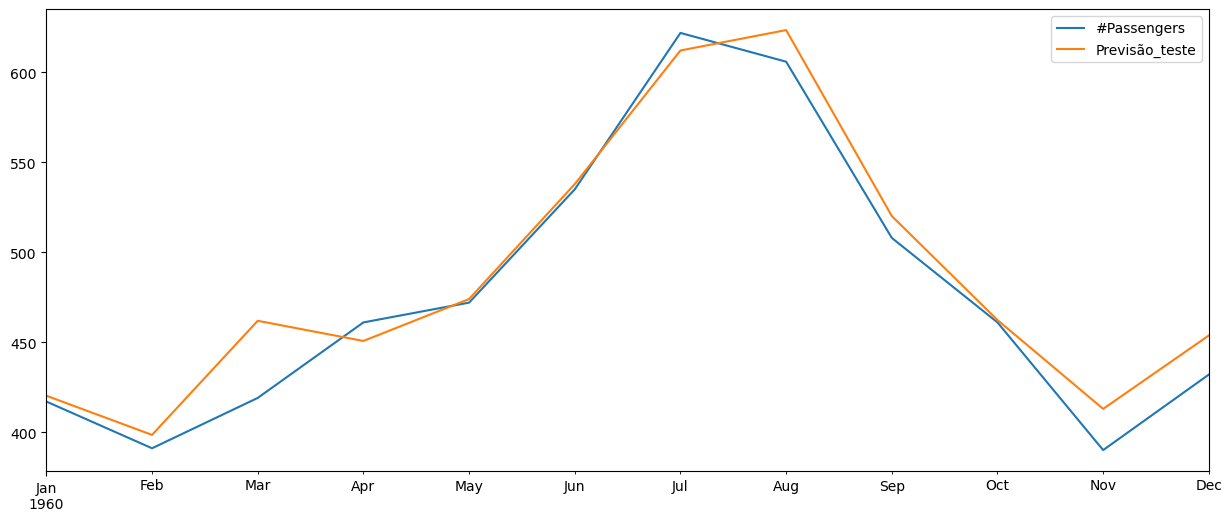

In [40]:
pd.concat([teste, previsao_teste], axis=1).plot()

In [41]:
modelo.fit(dados)

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(1, 1, 2, 12),
      suppress_warnings=True, with_intercept=False)

In [42]:
previsao_final = modelo.predict(12)

In [44]:
previsao_final = pd.DataFrame(previsao_final, columns=["Previsão_final"])
previsao_final

,Previsão_final
1961-01-01,450.053608
1961-02-01,422.963509
1961-03-01,465.827785
1961-04-01,490.334734
1961-05-01,507.781523
1961-06-01,575.302468
1961-07-01,663.440061
1961-08-01,657.624000
1961-09-01,549.387540
1961-10-01,495.696118


<AxesSubplot:>

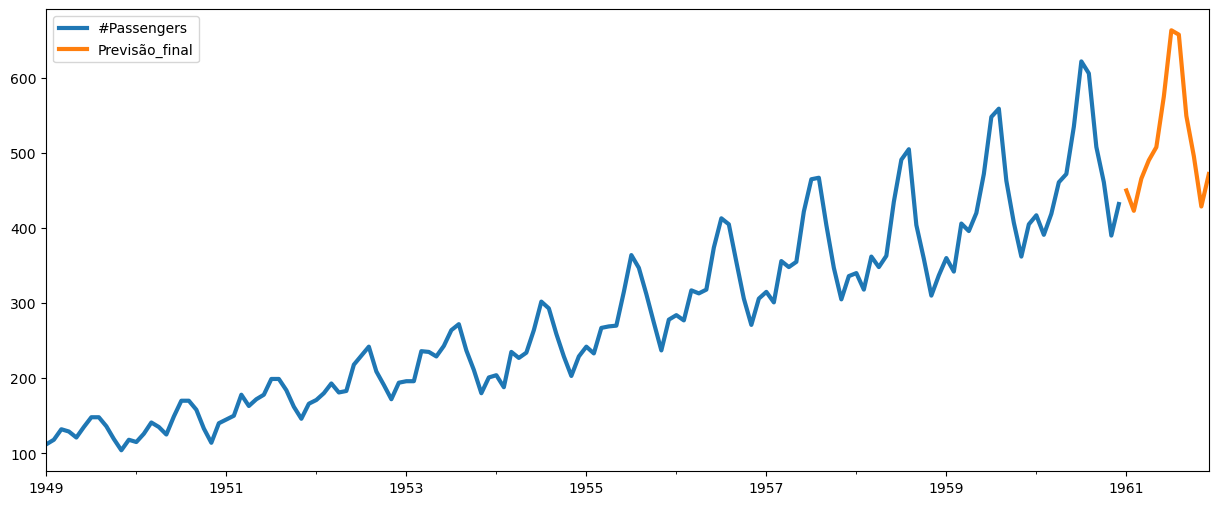

In [46]:
pd.concat([dados, previsao_final], axis=1).plot(linewidth=3)